In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize, LogNorm
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.special as special

In [4]:
#metode:

"""A variety of methods to solve first order ordinary differential equations.

AUTHOR:
    Jonathan Senning <jonathan.senning@gordon.edu>
    Gordon College
    Based Octave functions written in the spring of 1999
    Python version: March 2008, October 2008
"""

import numpy

#-----------------------------------------------------------------------------

def euler( f, x0, t ):
    """Euler's method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = euler(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """

    n = len( t )
    x = numpy.array( [x0] * n )
    for i in range( n - 1 ):
        x[i+1] = x[i] + ( t[i+1] - t[i] ) * f( x[i], t[i] )

    return x

#-----------------------------------------------------------------------------

def heun( f, x0, t ):
    """Heun's method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = heun(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """
    n = len( t )
    x = numpy.array( [x0] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + k1, t[i+1] )
        x[i+1] = x[i] + ( k1 + k2 ) / 2.0

    return x

#-----------------------------------------------------------------------------

def rk2a( f, x0, t ):
    """Second-order Runge-Kutta method to solve x' = f(x,t) with x(t[0]) = x0.
       Also known as Midpoint method

    USAGE:
        x = rk2a(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This version is based on the algorithm presented in "Numerical
        Analysis", 6th Edition, by Burden and Faires, Brooks-Cole, 1997.
    """

    n = len( t )
    x = numpy.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] ) / 2.0
        x[i+1] = x[i] + h * f( x[i] + k1, t[i] + h / 2.0 )

    return x

#-----------------------------------------------------------------------------

def rk2b( f, x0, t ):
    """Second-order Runge-Kutta method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = rk2b(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This version is based on the algorithm presented in "Numerical
        Mathematics and Computing" 4th Edition, by Cheney and Kincaid,
        Brooks-Cole, 1999.
    """

    n = len( t )
    x = numpy.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + k1, t[i+1] )
        x[i+1] = x[i] + ( k1 + k2 ) / 2.0

    return x

#-----------------------------------------------------------------------------

def rku4( f, x0, t ):
    """Fourth-order Runge-Kutta method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = rku4(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """

    n = len( t )
    x = numpy.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0

    return x

#-----------------------------------------------------------------------------

def rk45( f, x0, t ):
    """Fourth-order Runge-Kutta method with error estimate.

    USAGE:
        x, err = rk45(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
        err   - NumPy array containing estimate of errors at each step.  If
                a system is being solved, err will be an array of arrays.

    NOTES:
        This version is based on the algorithm presented in "Numerical
        Mathematics and Computing" 6th Edition, by Cheney and Kincaid,
        Brooks-Cole, 2008.
    """

    # Coefficients used to compute the independent variable argument of f

    c20  =   2.500000000000000e-01  #  1/4
    c30  =   3.750000000000000e-01  #  3/8
    c40  =   9.230769230769231e-01  #  12/13
    c50  =   1.000000000000000e+00  #  1
    c60  =   5.000000000000000e-01  #  1/2

    # Coefficients used to compute the dependent variable argument of f

    c21 =   2.500000000000000e-01  #  1/4
    c31 =   9.375000000000000e-02  #  3/32
    c32 =   2.812500000000000e-01  #  9/32
    c41 =   8.793809740555303e-01  #  1932/2197
    c42 =  -3.277196176604461e+00  # -7200/2197
    c43 =   3.320892125625853e+00  #  7296/2197
    c51 =   2.032407407407407e+00  #  439/216
    c52 =  -8.000000000000000e+00  # -8
    c53 =   7.173489278752436e+00  #  3680/513
    c54 =  -2.058966861598441e-01  # -845/4104
    c61 =  -2.962962962962963e-01  # -8/27
    c62 =   2.000000000000000e+00  #  2
    c63 =  -1.381676413255361e+00  # -3544/2565
    c64 =   4.529727095516569e-01  #  1859/4104
    c65 =  -2.750000000000000e-01  # -11/40

    # Coefficients used to compute 4th order RK estimate

    a1  =   1.157407407407407e-01  #  25/216
    a2  =   0.000000000000000e-00  #  0
    a3  =   5.489278752436647e-01  #  1408/2565
    a4  =   5.353313840155945e-01  #  2197/4104
    a5  =  -2.000000000000000e-01  # -1/5

    b1  =   1.185185185185185e-01  #  16.0/135.0
    b2  =   0.000000000000000e-00  #  0
    b3  =   5.189863547758284e-01  #  6656.0/12825.0
    b4  =   5.061314903420167e-01  #  28561.0/56430.0
    b5  =  -1.800000000000000e-01  # -9.0/50.0
    b6  =   3.636363636363636e-02  #  2.0/55.0

    n = len( t )
    x = numpy.array( [ x0 ] * n )
    e = numpy.array( [ 0 * x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        k2 = h * f( x[i] + c21 * k1, t[i] + c20 * h )
        k3 = h * f( x[i] + c31 * k1 + c32 * k2, t[i] + c30 * h )
        k4 = h * f( x[i] + c41 * k1 + c42 * k2 + c43 * k3, t[i] + c40 * h )
        k5 = h * f( x[i] + c51 * k1 + c52 * k2 + c53 * k3 + c54 * k4, \
                        t[i] + h )
        k6 = h * f( \
            x[i] + c61 * k1 + c62 * k2 + c63 * k3 + c64 * k4 + c65 * k5, \
            t[i] + c60 * h )

        x[i+1] = x[i] + a1 * k1 + a3 * k3 + a4 * k4 + a5 * k5
        x5 = x[i] + b1 * k1 + b3 * k3 + b4 * k4 + b5 * k5 + b6 * k6

        e[i+1] = abs( x5 - x[i+1] )

    return ( x, e )

#-----------------------------------------------------------------------------

def rkf( f, a, b, x0, tol, hmax, hmin ):
    """Runge-Kutta-Fehlberg method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        t, x = rkf(f, a, b, x0, tol, hmax, hmin)

    INPUT:
        f     - function equal to dx/dt = f(x,t)
        a     - left-hand endpoint of interval (initial condition is here)
        b     - right-hand endpoint of interval
        x0    - initial x value: x0 = x(a)
        tol   - maximum value of local truncation error estimate
        hmax  - maximum step size
        hmin  - minimum step size

    OUTPUT:
        t     - NumPy array of independent variable values
        x     - NumPy array of corresponding solution function values

    NOTES:
        This function implements 4th-5th order Runge-Kutta-Fehlberg Method
        to solve the initial value problem

           dx
           -- = f(x,t),     x(a) = x0
           dt

        on the interval [a,b].

        Based on pseudocode presented in "Numerical Analysis", 6th Edition,
        by Burden and Faires, Brooks-Cole, 1997.
    """

    # Coefficients used to compute the independent variable argument of f

    a2  =   2.500000000000000e-01  #  1/4
    a3  =   3.750000000000000e-01  #  3/8
    a4  =   9.230769230769231e-01  #  12/13
    a5  =   1.000000000000000e+00  #  1
    a6  =   5.000000000000000e-01  #  1/2

    # Coefficients used to compute the dependent variable argument of f

    b21 =   2.500000000000000e-01  #  1/4
    b31 =   9.375000000000000e-02  #  3/32
    b32 =   2.812500000000000e-01  #  9/32
    b41 =   8.793809740555303e-01  #  1932/2197
    b42 =  -3.277196176604461e+00  # -7200/2197
    b43 =   3.320892125625853e+00  #  7296/2197
    b51 =   2.032407407407407e+00  #  439/216
    b52 =  -8.000000000000000e+00  # -8
    b53 =   7.173489278752436e+00  #  3680/513
    b54 =  -2.058966861598441e-01  # -845/4104
    b61 =  -2.962962962962963e-01  # -8/27
    b62 =   2.000000000000000e+00  #  2
    b63 =  -1.381676413255361e+00  # -3544/2565
    b64 =   4.529727095516569e-01  #  1859/4104
    b65 =  -2.750000000000000e-01  # -11/40

    # Coefficients used to compute local truncation error estimate.  These
    # come from subtracting a 4th order RK estimate from a 5th order RK
    # estimate.

    r1  =   2.777777777777778e-03  #  1/360
    r3  =  -2.994152046783626e-02  # -128/4275
    r4  =  -2.919989367357789e-02  # -2197/75240
    r5  =   2.000000000000000e-02  #  1/50
    r6  =   3.636363636363636e-02  #  2/55

    # Coefficients used to compute 4th order RK estimate

    c1  =   1.157407407407407e-01  #  25/216
    c3  =   5.489278752436647e-01  #  1408/2565
    c4  =   5.353313840155945e-01  #  2197/4104
    c5  =  -2.000000000000000e-01  # -1/5

    # Set t and x according to initial condition and assume that h starts
    # with a value that is as large as possible.

    t = a
    x = x0
    h = hmax

    # Initialize arrays that will be returned

    T = numpy.array( [t] )
    X = numpy.array( [x] )

    while t < b:

        # Adjust step size when we get to last interval

        if t + h > b:
            h = b - t;

        # Compute values needed to compute truncation error estimate and
        # the 4th order RK estimate.

        k1 = h * f( x, t )
        k2 = h * f( x + b21 * k1, t + a2 * h )
        k3 = h * f( x + b31 * k1 + b32 * k2, t + a3 * h )
        k4 = h * f( x + b41 * k1 + b42 * k2 + b43 * k3, t + a4 * h )
        k5 = h * f( x + b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4, t + a5 * h )
        k6 = h * f( x + b61 * k1 + b62 * k2 + b63 * k3 + b64 * k4 + b65 * k5, \
                    t + a6 * h )

        # Compute the estimate of the local truncation error.  If it's small
        # enough then we accept this step and save the 4th order estimate.

        r = abs( r1 * k1 + r3 * k3 + r4 * k4 + r5 * k5 + r6 * k6 ) / h
        if len( numpy.shape( r ) ) > 0:
            r = max( r )
        if r <= tol:
            t = t + h
            x = x + c1 * k1 + c3 * k3 + c4 * k4 + c5 * k5
            T = numpy.append( T, t )
            X = numpy.append( X, [x], 0 )

        # Now compute next step size, and make sure that it is not too big or
        # too small.

        h = h * min( max( 0.84 * ( tol / r )**0.25, 0.1 ), 4.0 )

        if h > hmax:
            h = hmax
        elif h < hmin:
            print("Error: stepsize should be smaller than %e." % hmin)
            break

    # endwhile

    return ( T, X )

#-----------------------------------------------------------------------------

def pc4( f, x0, t ):
    """Adams-Bashforth-Moulton 4th order predictor-corrector method

    USAGE:
        x = pc4(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This function used the Adams-Bashforth-Moulton predictor-corrector
        method to solve the initial value problem

            dx
            -- = f(x,t),     x(t(1)) = x0
            dt

        at the t values stored in the t array (so the interval of solution is
        [t[0], t[N-1]].  The 4th-order Runge-Kutta method is used to generate
        the first three values of the solution.  Notice that it works equally
        well for scalar functions f(x,t) (in the case of a single 1st order
        ODE) or for vector functions f(x,t) (in the case of multiple 1st order
        ODEs).

    """

    n = len( t )
    x = numpy.array( [ x0 ] * n )

    # Start up with 4th order Runge-Kutta (single-step method).  The extra
    # code involving f0, f1, f2, and f3 helps us get ready for the multi-step
    # method to follow in order to minimize the number of function evaluations
    # needed.

    f1 = f2 = f3 = 0
    for i in range( min( 3, n - 1 ) ):
        h = t[i+1] - t[i]
        f0 = f( x[i], t[i] )
        k1 = h * f0
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0
        f1, f2, f3 = ( f0, f1, f2 )

    # Begin Adams-Bashforth-Moulton steps

    for i in range( 3, n - 1 ):
        h = t[i+1] - t[i]
        f0 = f( x[i], t[i] )
        w = x[i] + h * ( 55.0 * f0 - 59.0 * f1 + 37.0 * f2 - 9.0 * f3 ) / 24.0
        fw = f( w, t[i+1] )
        x[i+1] = x[i] + h * ( 9.0 * fw + 19.0 * f0 - 5.0 * f1 + f2 ) / 24.0
        f1, f2, f3 = ( f0, f1, f2 )

    return x

#-----------------------------------------------------------------------------

def verlet( f, x0, v0, t ):
    """Verlet's 2nd order symplectic method

    USAGE:
        (x,v) = verlet(f, x0, v0, t)

    INPUT:
        f     - function of x and t equal to d^2x/dt^2.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s) of x.  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        v0    - the initial condition(s) of v=dx/dt.  Specifies the value of v when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values for x corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
        v     - NumPy array containing solution values for v=dx/dt corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This function used the Varlet/Stoermer/Encke (symplectic) method
        method to solve the initial value problem

            dx^2
            -- = f(x),     x(t(1)) = x0  v(t(1)) = v0
            dt^2

        at the t values stored in the t array (so the interval of solution is
        [t[0], t[N-1]].  The 3rd-order Taylor is used to generate
        the first values of the solution.

    """
    n = len( t )
    x = numpy.array( [ x0 ] * n )
    v = numpy.array( [ v0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        x[i+1] = x[i] + h * v[i] + (h*h/2) * f(x[i])
        v[i+1] = v[i] + (h/2) * ( f(x[i])+f(x[i+1]))

    return numpy.array([x,v])

def pefrl( f, x0, v0, t ):
    """Position Extended Forest-Ruth Like 4th order symplectic method by Omelyan et al.

    USAGE:
        (x,v) = pefrl(f, x0, v0, t)

    INPUT:
        f     - function of x and t equal to d^2x/dt^2.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s) of x.  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        v0    - the initial condition(s) of v=dx/dt.  Specifies the value of v when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values for x corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
        v     - NumPy array containing solution values for v=dx/dt corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This function uses the Omelyan et al (symplectic) method
        method to solve the initial value problem

            dx^2
            -- = f(x),     x(t(1)) = x0  v(t(1)) = v0
            dt^2

        at the t values stored in the t array (so the interval of solution is
        [t[0], t[N-1]].

    """

    xsi=0.1786178958448091
    lam=-0.2123418310626054
    chi=-0.6626458266981849e-1
    n = len( t )
    x = numpy.array( [ x0 ] * n )
    v = numpy.array( [ v0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        y=numpy.copy(x[i])
        w=numpy.copy(v[i])
        y += xsi*h*w
        w += (1-2*lam)*(h/2)*f(y)
        y += chi*h*w
        w += lam*h*f(y)
        y += (1-2*(chi+xsi))*h*w
        w += lam*h*f(y)
        y += chi*h*w
        w += (1-2*lam)*(h/2)*f(y)
        y += xsi*h*w
        x[i+1]=numpy.copy(y)
        v[i+1]=numpy.copy(w)

    return numpy.array([x,v])


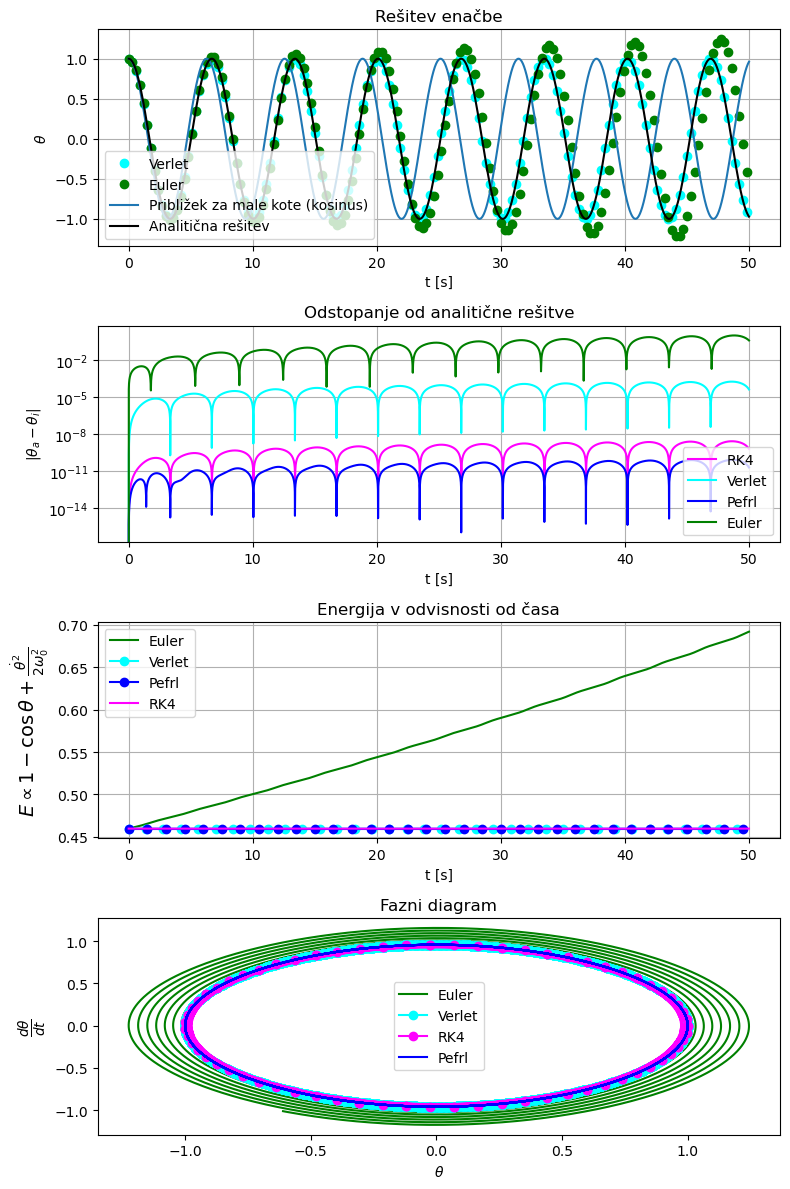

In [200]:
g = 9.81
l = 10.
omega = np.sqrt(g/l)
omega=1.
X_0 = np.array([1., 0])
# X_0 = np.array([0, 0])


def force(x):#, args=[9.81, 10.]):
    # g = args[0]
    # l = args[1]
    # omega = g/l
    # print(np.sin(x))
    return -omega**2 * np.sin(x)

def nihalo(x,t):
    X = np.zeros_like(x)
    X[0] = x[1]
    X[1] = force(x[0])
    # print(X)
    return X

def energija(theta, d_theta):
    return 1 - np.cos(theta) + d_theta**2/(2*omega**2)

def anal_res(t, X_0):
    par_0 = special.ellipk(np.sin(X_0[0]/2)**2 , out=None) #nihajni čas /(4/omega)
    return 2 * np.arcsin(np.sin(X_0[0]/2) * special.ellipj(par_0 - omega * t, (np.sin(X_0[0]/2)**2))[0])
    

#RK4
t = np.arange(0,50,0.01)
x = rku4(nihalo, X_0, t).T

theta = x[0]
d_theta = x[1]
energ = energija(theta, d_theta)


#Euler:
x2 = euler(nihalo, X_0, t).T

theta2 = x2[0]
d_theta2 = x2[1]
energ2 = energija(theta2, d_theta2)


#verlet:
res_v = verlet(force, X_0[0], X_0[1], t)
theta_v = res_v[0]
d_theta_v = res_v[1]
energ_v = energija(theta_v, d_theta_v)


#verlet:
res_p = pefrl(force, X_0[0], X_0[1], t)
theta_p = res_p[0]
d_theta_p = res_p[1]
energ_p = energija(theta_p, d_theta_p)

plt.figure(figsize=(8,12))
plt.subplot(4,1,1)
plt.plot(t[::30], theta_v[::30], marker='o',color='cyan',linestyle='', label='Verlet')
plt.plot(t[::30], theta2[::30], marker='o',color='green',linestyle='', label='Euler')
#približek mali koti
plt.plot(t,np.cos(t), label = 'Približek za male kote (kosinus)')
plt.title('Rešitev enačbe')
plt.xlabel('t [s]')
plt.ylabel(r'$\theta$')

#analitična rešitev
anal_sol = anal_res(t, X_0)
plt.plot(t,anal_sol, color='black', label='Analitična rešitev')
plt.legend(loc='lower left')
plt.grid()


# plt.figure()
plt.subplot(4,1,2)
plt.plot(t,np.abs(theta-anal_sol),color='magenta', label='RK4')
plt.plot(t,np.abs(theta_v-anal_sol),color='cyan', label='Verlet')
plt.plot(t,np.abs(theta_p-anal_sol),color='blue', label='Pefrl')
plt.plot(t,np.abs(theta2-anal_sol),color='green', label='Euler')
plt.legend()
plt.grid()
plt.yscale('log')
plt.title('Odstopanje od analitične rešitve')
plt.xlabel('t [s]')
plt.ylabel(r'$|\theta_a - \theta_i|$')

# plt.figure()
plt.subplot(4,1,4)
plt.plot(theta2, d_theta2,color='green', label='Euler')
plt.plot(theta_v, d_theta_v,color='cyan',marker='o', label='Verlet')
plt.plot(theta[::50], d_theta[::50],color='magenta', marker='o', label='RK4')
plt.plot(theta_p, d_theta_p,color='blue', label='Pefrl')
plt.legend()
plt.title('Fazni diagram')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{d\theta}{dt}$', fontsize=14)

# plt.figure()
plt.subplot(4,1,3)
plt.plot(t,energ2,color='green', label='Euler')
plt.plot(t[::140],energ_v[::140],color='cyan',marker='o', label='Verlet')
plt.plot(t[::150],energ_p[::150],color='blue',marker='o', label='Pefrl')
plt.plot(t,energ,color='magenta', label='RK4')
plt.legend()
plt.title('Fazni diagram')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{d\theta}{dt}$', fontsize=14)
plt.title('Energija v odvisnosti od časa')
plt.xlabel('t [s]')
plt.ylabel(r'$E \propto  1-\cos \theta + \frac{\dot{\theta}^2 }{2 \omega_0^2} $')
plt.grid()
plt.tight_layout()
plt.savefig('primerjava_1')

In [6]:
def plotter(t, X_0, omega, metoda = 'verlet', anal_solution= True):
    """
    
    usage: plotter(t, X_0, omega, metoda = 'verlet', anal_solution= True)
    metode: ['verlet', 'pefrl','euler', 'heun', 'rk2a', 'rk2b', 'rku4', 'rk45', 'pc4']

    """

    def force(x):
        return -omega**2 * np.sin(x)

    def nihalo(x,t):
        X = np.zeros_like(x)
        X[0] = x[1]
        X[1] = force(x[0])
        # print(X)
        return X

    def anal_res(t, X_0):
        par_0 = special.ellipk(np.sin(X_0[0]/2)**2 , out=None) #nihajni čas /(4/omega)
        return 2 * np.arcsin(np.sin(X_0[0]/2) * special.ellipj(par_0 - omega * t, (np.sin(X_0[0]/2)**2))[0])
        

    if metoda == 'verlet':
        res = verlet(force, X_0[0], X_0[1], t)
        theta = res[0]
        d_theta = res[1]
    elif metoda == 'pefrl':
        res = pefrl(force, X_0[0], X_0[1], t)
        theta = res[0]
        d_theta = res[1]

    elif metoda == 'euler':
        res = euler(nihalo, X_0, t).T
        theta = res[0]
        d_theta = res[1]

    elif metoda == 'heun':
        res = heun(nihalo, X_0, t).T
        theta = res[0]
        d_theta = res[1]

    elif metoda == "rk2a":
        res = rk2a(nihalo, X_0, t).T
        theta = res[0]
        d_theta = res[1]
    elif metoda == "rk2b":
        res = rk2b(nihalo, X_0, t).T
        theta = res[0]
        d_theta = res[1]
    elif metoda == "rku4":
        res = rku4(nihalo, X_0, t).T
        theta = res[0]
        d_theta = res[1]
    elif metoda == "rk45":
        res, error = rk45(nihalo, X_0, t)
        theta = res.T[0]
        d_theta = res.T[1]  #tega mors prevert kaj mece vn
    elif metoda == "rkf":
        a = t[0]
        b = t[-1]
        res = rkf(nihalo, a, b, X_0, tol, hmax=10, hmin=5)
        theta = res[0][0]
        d_theta = res[0][1]  #tega mors prevert kaj mece vn
        T_res = T_resitev(t, [k, T_zun, T_0])
    elif metoda == "pc4":
        res = pc4(nihalo, X_0, t).T
        theta = res[0]
        d_theta = res[1]
    else:
        print("error: metoda ne obstaja ): ")

    if anal_solution == True:
        theta_res = anal_res(t, X_0)
        error = np.abs(theta-theta_res)
        return theta, d_theta, theta_res, error
    else:
        return theta, d_theta



/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8757/2483350779.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


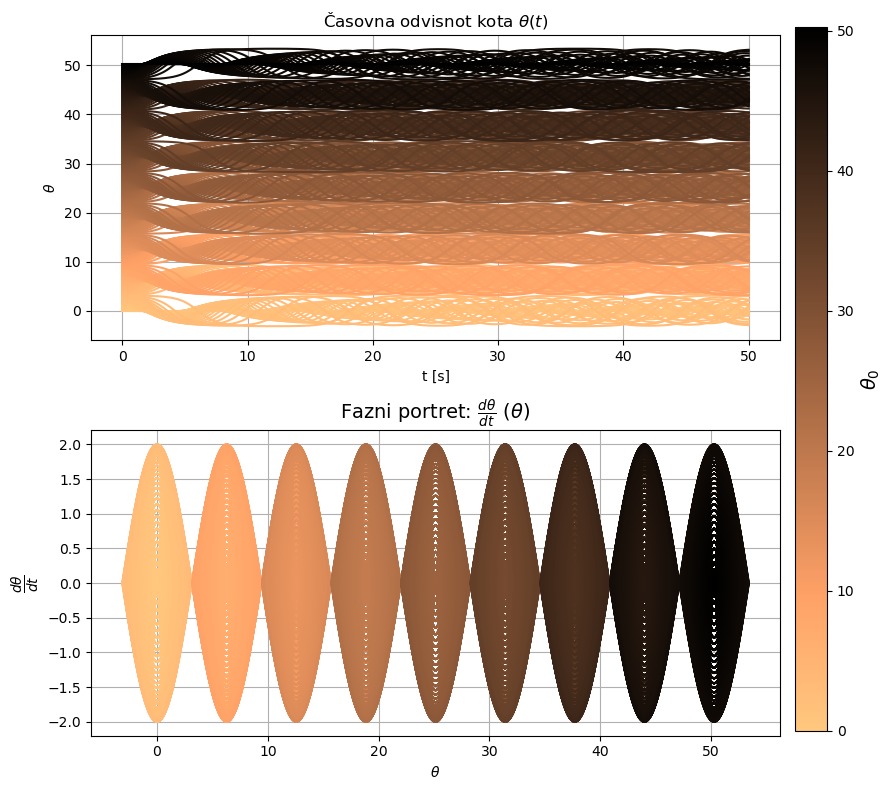

In [86]:

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
cmap1 = plt.get_cmap("copper_r")

g = 9.81
l = 10.
omega = g/l
omega= 1.
X_0 = np.array([1., 0])

b_s = np.linspace(0.8, 1, 100)
a_s = np.linspace(np.pi-1e-10, np.pi+1e-10, 100)
a_s = np.linspace(0, np.pi, 100) #omega = 1
a_s = np.linspace(np.pi-1e-10, np.pi+1e-10, 1000) #omega = 3
a_s = np.linspace(0, 16 * np.pi, 500)


norm1 = Normalize(vmin=min(a_s), vmax=max(a_s))
Ts = []
ts = []
errs = []
t = np.linspace(0,50, 1000)
# a_s = [1]
for ind,a in enumerate(a_s):
    # for ind,b in enumerate(b_s):
    # omega = a

    res_v = pefrl(force, a, X_0[1], t)
    theta_v = res_v[0]
    d_theta_v = res_v[1]

    # res_v = pefrl(force, X_0, X_0[1], t)
    # theta_v = res_v[0]
    # d_theta_v = res_v[1]

    color = cmap1(norm1(a))

    axs[0].plot(t,theta_v,color=color)
    # axs[1].plot(d_theta_v,theta_v,color=color)
    axs[1].plot(theta_v, d_theta_v,color=color)

omega = 1
res_v = verlet(force, X_0[0], X_0[1], t)
theta_v = res_v[0]
d_theta_v = res_v[1]
# axs[0].plot(t,theta_v,color='red', label=r'$\omega = 1$')
# axs[1].plot(theta_v, d_theta_v,color='red', label=r'$\omega = 1$')

axs[0].set_xlabel('t [s]')
axs[0].set_ylabel(r'$\theta$')
axs[0].set_title(r'Časovna odvisnot kota $\theta (t)$')
axs[0].grid()
# axs[0].legend()

axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$\frac{d\theta}{dt}$', fontsize=14)
axs[1].set_title(r'Fazni portret: $\frac{d\theta}{dt}$ $(\theta)$', fontsize=14)
axs[1].grid()
# axs[1].legend()


cax = fig.add_axes([1, 0.08, 0.04, 0.88])
cbar1 = fig.colorbar(cm.ScalarMappable(cmap=cmap1, norm=norm1),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar1.set_label(r'$\theta_0$', fontsize=14)

plt.tight_layout()
plt.savefig('odv_theta_0_divergiranje', bbox_inches="tight")

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8757/2382054676.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


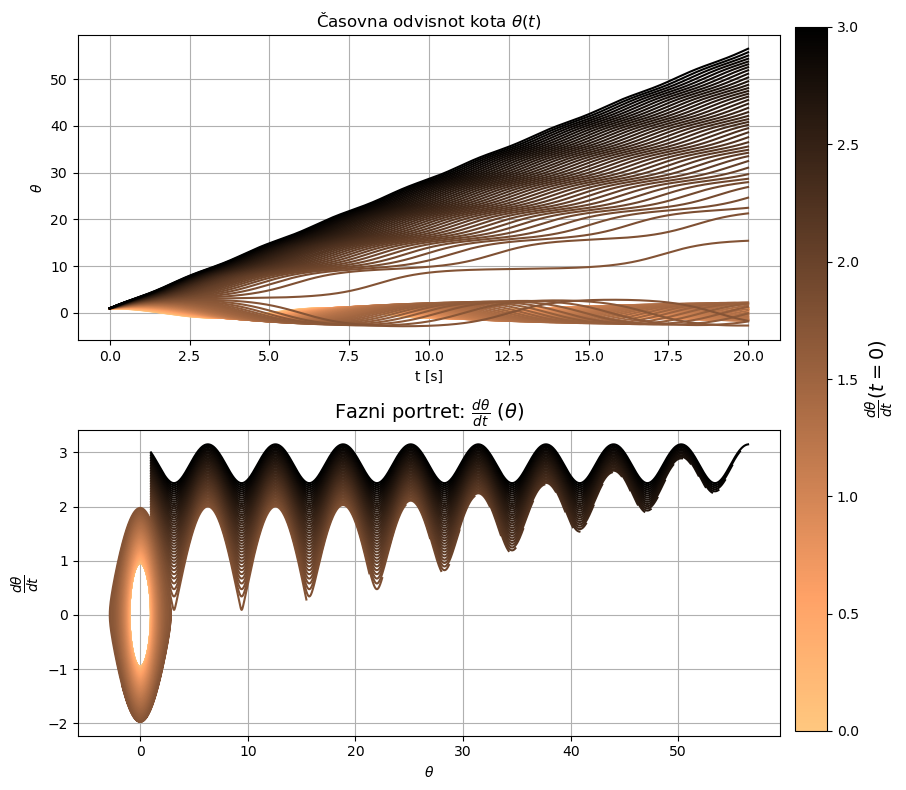

In [91]:

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
cmap1 = plt.get_cmap("copper_r")

g = 9.81
l = 10.
omega = g/l
omega= 1
X_0 = np.array([0., 0.])

# b_s = np.linspace(0.8, 1, 100)
a_s = np.linspace(np.pi-1e-10, np.pi+1e-10, 100)
a_s = np.linspace(np.pi-1e-10, np.pi+1e-10, 100)
a_s = np.linspace(0, 3, 100)


norm1 = Normalize(vmin=min(a_s), vmax=max(a_s))
Ts = []
ts = []
errs = []
t = np.linspace(0,20, 1000)
# a_s = [1]
for ind,a in enumerate(a_s):
    # for ind,b in enumerate(b_s):
    # omega = a

    res_v = pefrl(force, x_0[0], a, t)
    theta_v = res_v[0]
    d_theta_v = res_v[1]

    # res_v = pefrl(force, X_0, X_0[1], t)
    # theta_v = res_v[0]
    # d_theta_v = res_v[1]

    color = cmap1(norm1(a))

    axs[0].plot(t,theta_v,color=color)
    # axs[1].plot(d_theta_v,theta_v,color=color)
    axs[1].plot(theta_v, d_theta_v,color=color)

omega = 1
res_v = verlet(force, X_0[0], X_0[1], t)
theta_v = res_v[0]
d_theta_v = res_v[1]
# axs[0].plot(t,theta_v,color='red', label=r'$\omega = 1$')
# axs[1].plot(theta_v, d_theta_v,color='red', label=r'$\omega = 1$')

axs[0].set_xlabel('t [s]')
axs[0].set_ylabel(r'$\theta$')
axs[0].set_title(r'Časovna odvisnot kota $\theta (t)$')
axs[0].grid()
# axs[0].legend()

axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$\frac{d\theta}{dt}$', fontsize=14)
axs[1].set_title(r'Fazni portret: $\frac{d\theta}{dt}$ $(\theta)$', fontsize=14)
axs[1].grid()
# axs[1].legend()


cax = fig.add_axes([1, 0.08, 0.04, 0.88])
cbar1 = fig.colorbar(cm.ScalarMappable(cmap=cmap1, norm=norm1),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar1.set_label(r'$\frac{d\theta}{dt}(t=0)$', fontsize=14)

plt.tight_layout()
plt.savefig('odv_dtheta_0', bbox_inches="tight")

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8757/3144857761.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


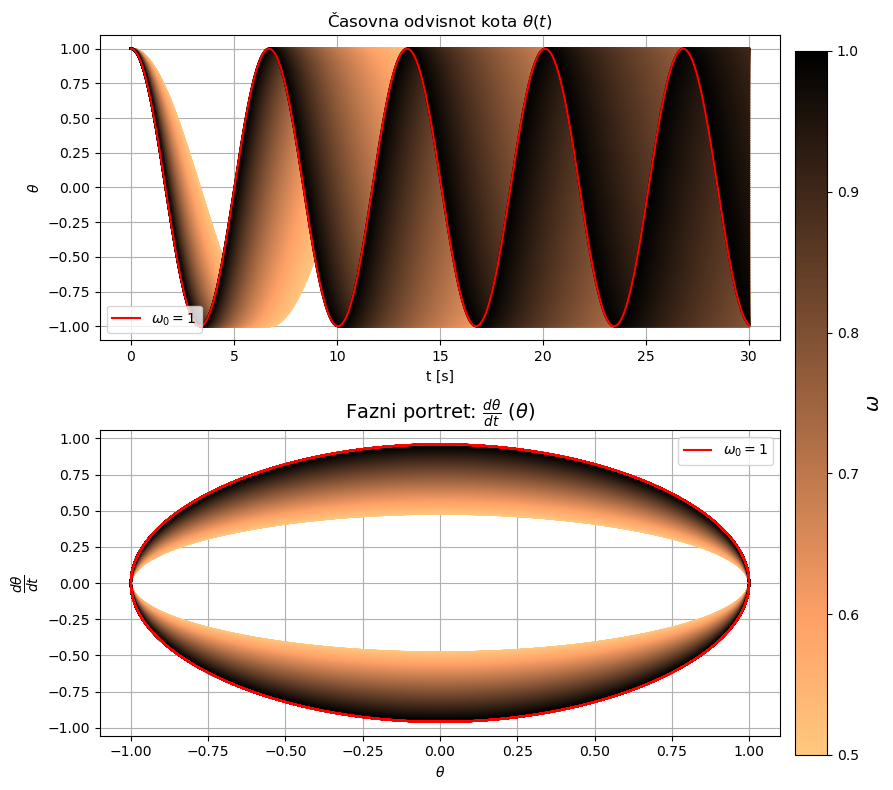

In [16]:

g = 9.81
l = 10.
omega = g/l
X_0 = np.array([1., 0])

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
cmap1 = plt.get_cmap("copper_r")

g = 9.81
l = 10.
omega = g/l
X_0 = np.array([1., 0])


a_s = np.linspace(0.5, 1., 1000)
norm1 = Normalize(vmin=min(a_s), vmax=max(a_s))
Ts = []
ts = []
errs = []
t = np.linspace(0,30, 1000)
for ind,a in enumerate(a_s):
    omega = a

    res_v = verlet(force, X_0[0], X_0[1], t)
    theta_v = res_v[0]
    d_theta_v = res_v[1]

    color = cmap1(norm1(a))

    axs[0].plot(t,theta_v,color=color)
    axs[1].plot(theta_v,d_theta_v,color=color)

omega = 1.
res_v = verlet(force, X_0[0], X_0[1], t)
theta_v = res_v[0]
d_theta_v = res_v[1]

axs[1].plot(theta_v,d_theta_v,color='red', linestyle= '-', label=r'$\omega_0 = 1$')
axs[0].plot(t,theta_v,color='red', linestyle= '-', label=r'$\omega_0 = 1$')


cax = fig.add_axes([1, 0.05, 0.04, 0.88])
cbar1 = fig.colorbar(cm.ScalarMappable(cmap=cmap1, norm=norm1),cax=cax, ax=axs,location='right')
cbar1.set_label(r'$\omega$', fontsize=14)

axs[0].set_xlabel('t [s]')
axs[0].set_ylabel(r'$\theta$')
axs[0].set_title(r'Časovna odvisnot kota $\theta (t)$')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$\frac{d\theta}{dt}$', fontsize=14)
axs[1].set_title(r'Fazni portret: $\frac{d\theta}{dt}$ $(\theta)$', fontsize=14)
axs[1].grid()
axs[1].legend()
plt.tight_layout()
plt.savefig('odv_omega', bbox_inches="tight")

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8757/3915161100.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


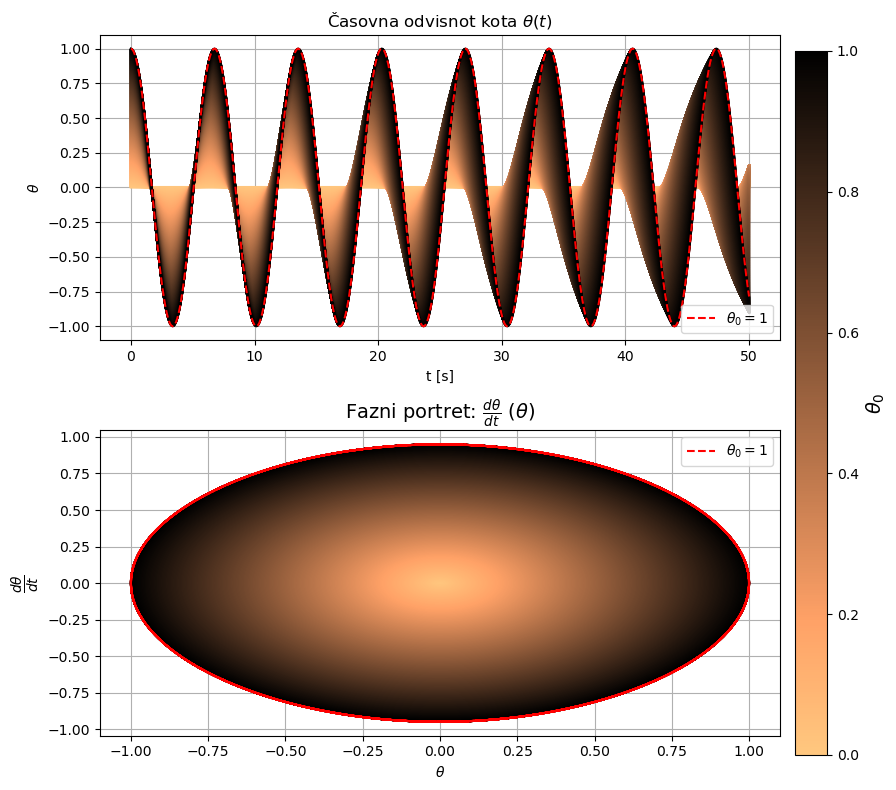

In [93]:

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
cmap1 = plt.get_cmap("copper_r")

g = 9.81
l = 10.
omega = np.sqrt(g/l)
X_0 = np.array([1., 0])
t = np.linspace(0,50, 1000)


a_s2 = np.linspace(0,1,1000)
norm2 = Normalize(vmin=min(a_s2), vmax=max(a_s2))
cmap2 = plt.get_cmap("copper_r")
for ind,a in enumerate(a_s2):
    omega = np.sqrt(g/l)
    
    res_v = verlet(force, a, X_0[1], t)

    theta_v = res_v[0]
    d_theta_v = res_v[1]

    color = cmap2(norm2(a))

    axs[0].plot(t,theta_v,color=color)
    axs[1].plot(theta_v,d_theta_v,color=color)

res_v = verlet(force, X_0[0], X_0[1], t)

theta_v = res_v[0]
d_theta_v = res_v[1]
axs[1].plot(theta_v,d_theta_v,color='red', linestyle= '--', label=r'$\theta_0 = 1$')
axs[0].plot(t,theta_v,color='red', linestyle= '--', label=r'$\theta_0 = 1$')

cax = fig.add_axes([1, 0.05, 0.04, 0.88])
cbar2 = fig.colorbar(cm.ScalarMappable(cmap=cmap2, norm=norm2),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar2.set_label(r'$\theta_0$', fontsize=14)



axs[0].set_xlabel('t [s]')
axs[0].set_ylabel(r'$\theta$')
axs[0].set_title(r'Časovna odvisnot kota $\theta (t)$')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$\frac{d\theta}{dt}$', fontsize=14)
axs[1].set_title(r'Fazni portret: $\frac{d\theta}{dt}$ $(\theta)$', fontsize=14)
axs[1].grid()
axs[1].legend()
plt.tight_layout()
plt.savefig('odv_theta_0', bbox_inches="tight")

In [10]:
# lah pogledas kok cajta ksna metoda drži pokonc
#primerjava za male kote:
#razlike med priblizkom in matematicnim v odvisnosti od zacetnega kota

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8757/4262535616.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


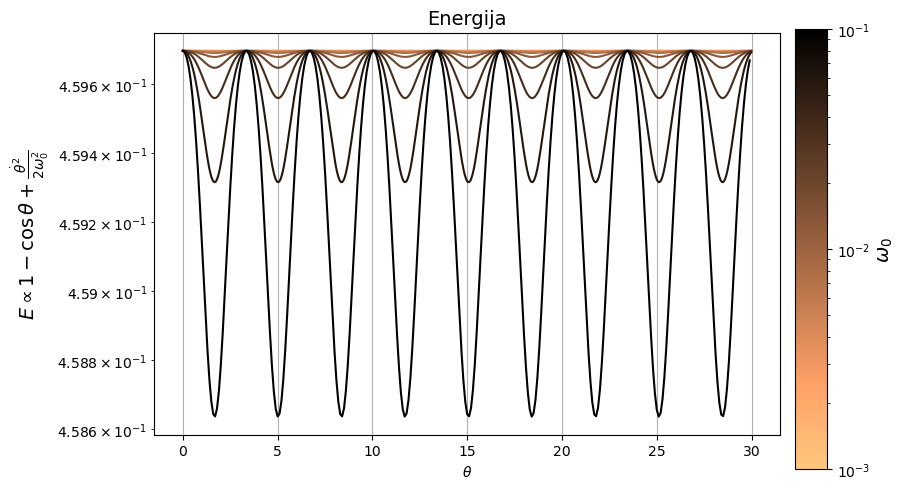

In [117]:

g = 9.81
l = 10.
omega = g/l
X_0 = np.array([1., 0])

fig, axs = plt.subplots(1, 1, figsize=(8, 5))
cmap1 = plt.get_cmap("copper_r")

g = 9.81
l = 10.
omega = np.sqrt(g/l)

omega = 1
X_0 = np.array([1., 0])


a_s = np.logspace(-3, -1, 10)
norm1 = LogNorm(vmin=min(a_s), vmax=max(a_s))
Ts = []
ts = []
errs = []
for ind,a in enumerate(a_s):
    t = np.arange(0,30, a)

    res_v = verlet(force, X_0[0], X_0[1], t)
    theta_v = res_v[0]
    d_theta_v = res_v[1]
    energ = energija(theta_v, d_theta_v)
    color = cmap1(norm1(a))

    # axs.plot(t,theta_v,color=color)
    # axs[1].plot(theta_v,d_theta_v,color=color)
    axs.plot(t, energ, color= color)
    # axs[1].plot(t, energ, color= color)

omega = 1.
res_v = verlet(force, X_0[0], X_0[1], t)
theta_v = res_v[0]
d_theta_v = res_v[1]

# axs[1].plot(theta_v,d_theta_v,color='red', linestyle= '-', label=r'$\omega_0 = 1$')
# axs.plot(t,theta_v,color='red', linestyle= '-', label=r'$\omega_0 = 1$')


cax = fig.add_axes([1, 0.05, 0.04, 0.88])
cbar1 = fig.colorbar(cm.ScalarMappable(cmap=cmap1, norm=norm1),cax=cax, ax=axs,location='right')
cbar1.set_label(r'$\omega_0$', fontsize=14)

# axs.set_xlabel('t [s]')
# axs.set_ylabel(r'$\theta$')
# axs.set_title(r'Časovna odvisnot kota $\theta (t)$')
# axs.grid()
# axs.legend()

axs.set_xlabel(r'$\theta$')
axs.set_ylabel(r'$E \propto  1-\cos \theta + \frac{\dot{\theta}^2 }{2 \omega_0^2} $', fontsize=14)
axs.set_title(r'Energija', fontsize=14)
axs.grid()
# axs.legend()
axs.set_yscale('log')

# axs[1].set_xlabel(r'$\theta$')
# axs[1].set_ylabel(r'$\frac{d\theta}{dt}$', fontsize=14)
# axs[1].set_title(r'Energija', fontsize=14)
# axs[1].grid()
# # axs[1].legend()
# axs[1].set_yscale('log')
# axs[1].set_ylim(4.59697 * 1e-1, np.max(energ))
plt.tight_layout()
plt.savefig('energija_verlet', bbox_inches="tight")

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8757/2534480607.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


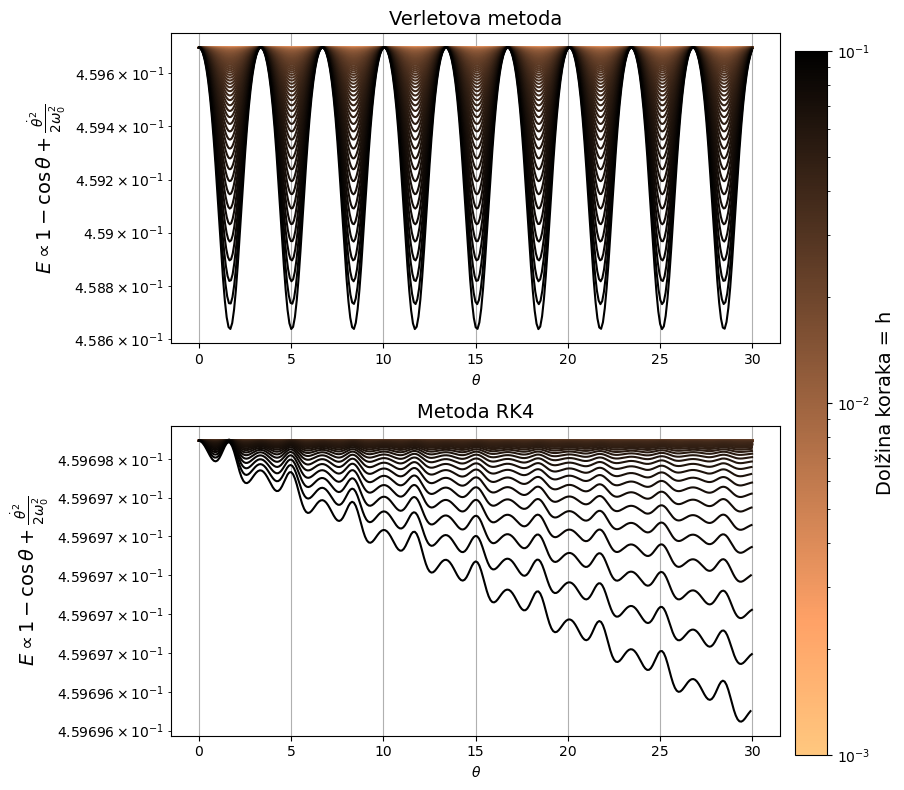

In [124]:

g = 9.81
l = 10.
omega = g/l
X_0 = np.array([1., 0])

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
cmap1 = plt.get_cmap("copper_r")

g = 9.81
l = 10.
omega = np.sqrt(g/l)

omega = 1.
X_0 = np.array([1., 0])


a_s = np.logspace(-3, -1, 100)
norm1 = LogNorm(vmin=min(a_s), vmax=max(a_s))
Ts = []
ts = []
errs = []
for ind,a in enumerate(a_s):
    t = np.arange(0,30, a)

    res_v = verlet(force, X_0[0], X_0[1], t)
    theta_v = res_v[0]
    d_theta_v = res_v[1]
    energ = energija(theta_v, d_theta_v)

    theta, d_theta, theta_res, error = plotter(t, X_0, omega, metoda = "rku4")
    theta_v = res_v[0]
    d_theta_v = res_v[1]
    energ2 = energija(theta, d_theta)
    color = cmap1(norm1(a))

    # axs.plot(t,theta_v,color=color)
    # axs[1].plot(theta_v,d_theta_v,color=color)
    axs[0].plot(t, energ, color= color)
    axs[1].plot(t, energ2, color= color)

omega = 1.
res_v = verlet(force, X_0[0], X_0[1], t)
theta_v = res_v[0]
d_theta_v = res_v[1]

cax = fig.add_axes([1, 0.05, 0.04, 0.88])
cbar1 = fig.colorbar(cm.ScalarMappable(cmap=cmap1, norm=norm1),cax=cax, ax=axs,location='right')
cbar1.set_label(r'Dolžina koraka = h', fontsize=14)

axs[0].set_xlabel(r'$\theta$')
axs[0].set_ylabel(r'$E \propto  1-\cos \theta + \frac{\dot{\theta}^2 }{2 \omega_0^2} $', fontsize=14)
axs[0].set_title(r'Verletova metoda', fontsize=14)
axs[0].grid()
axs[0].set_yscale('log')

axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$E \propto  1-\cos \theta + \frac{\dot{\theta}^2 }{2 \omega_0^2} $', fontsize=14)
axs[1].set_title(r'Metoda RK4', fontsize=14)
axs[1].grid()
axs[1].set_yscale('log')
# axs[1].set_ylim(4.59697 * 1e-1, np.max(energ))
plt.tight_layout()
plt.savefig('energija_verlet', bbox_inches="tight")

In [33]:
metode = ['euler', 'heun', 'rk2a', 'rku4', 'rk45', 'pc4','verlet', 'pefrl'] #"rkf", 'rk2b' excluded 
omega = 1.
x_0 = np.array([1., 0])
# print(help(plotter))
hs= np.logspace(-5, 0, 10)

data= []
for metoda in metode:
    data_temp = []
    time_metoda = []
    err_metoda = []
    for h in hs:
        time_temp = []
        t = np.arange(0,10,h)
        for _ in range(5):
            start_time = time.time()
            theta, d_theta, theta_res, error = plotter(t, X_0, omega, metoda = metoda)
            end_time = time.time()
            elapsed_time = end_time - start_time
            time_temp.append(elapsed_time)
        time_metoda.append(np.average(time_temp)) #povprecen cas za izracun qr za 50 lamb
        err_metoda.append(np.std(time_temp)) #povprecen cas za izracun qr za 5 lamb
        data_temp.append(max(error))
    print(metoda)
    np.save("time_" + metoda, time_metoda)
    np.save("err_" + metoda, err_metoda)
    np.save("data_" + metoda, data_temp)
np.save("hs_cas", hs)



euler
heun
rk2a
rku4
rk45
pc4
verlet
pefrl


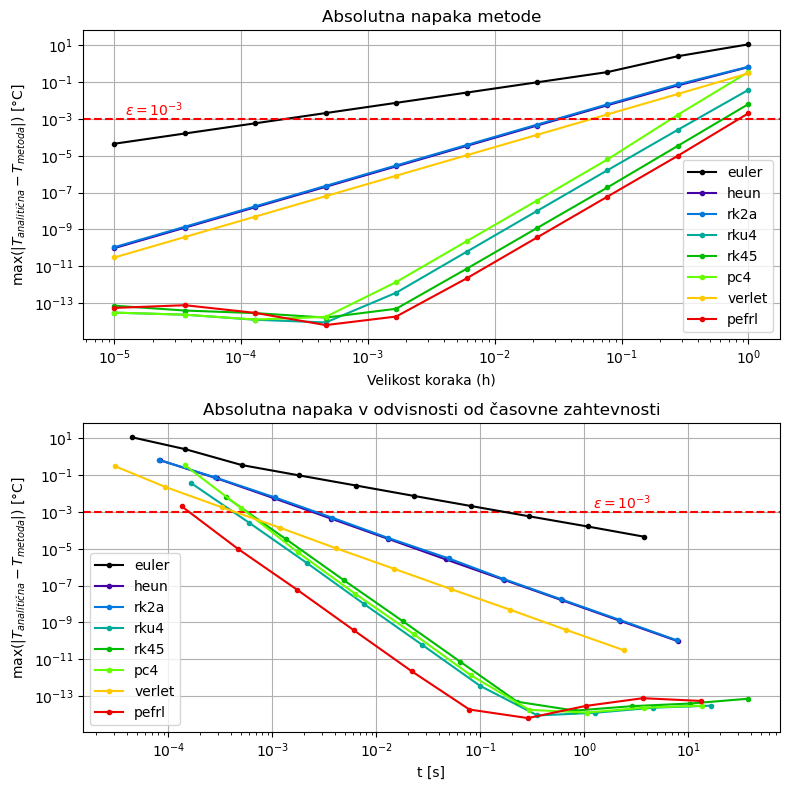

In [125]:
hs = np.load('hs_cas.npy')
# hs= np.logspace(-6, 1, 10)
metode = ['euler', 'heun', 'rk2a', 'rku4', 'rk45', 'pc4','verlet', 'pefrl'] #"rkf", 'rk2b' excluded 
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
cmap = plt.get_cmap("nipy_spectral")
norm = Normalize(vmin=0, vmax=len(metode))
for ind,metoda in enumerate(metode):
    time_metoda = np.load('time_'+ metoda + '.npy')
    err_metoda = np.load('err_'+ metoda + '.npy')
    data = np.load("data_" + metoda + '.npy')
    # print(len(time_metoda))
    # print(len(hs))
    color = cmap(norm(ind))
    axs[0].plot(hs, data, linestyle='-', marker='.', color=color, label=metoda)
    axs[1].errorbar(time_metoda, data, xerr=err_metoda, color=color, linestyle='-', marker='.', label=metoda)

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_title('Absolutna napaka metode')
axs[0].set_xlabel('Velikost koraka (h)')
axs[0].set_ylabel(r'$\max(|T_{analitična} - T_{metoda}|)$ [°C]')
axs[0].grid()
axs[0].legend()



axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title('Absolutna napaka v odvisnosti od časovne zahtevnosti')
axs[1].set_xlabel('t [s]')
axs[1].set_ylabel(r'$\max(|T_{analitična} - T_{metoda}|)$ [°C]')
axs[1].grid()
axs[1].legend()


y_value = 1e-3
axs[0].axhline(y=y_value, color='red', linestyle='--', label='1e-3')
axs[1].axhline(y=y_value, color='red', linestyle='--', label='1e-3')

axs[0].text(1.2e-5, 1.5e-3 , r'$\epsilon = 10^{-3}$', color='red', fontsize=10)
axs[1].text(1.2e0, 1.5e-3, r'$\epsilon = 10^{-3}$', color='red', fontsize=10)


plt.tight_layout()
plt.savefig('absolutna_napaka_2')


euler
heun
rk2a
rku4
rk45
pc4
verlet
pefrl


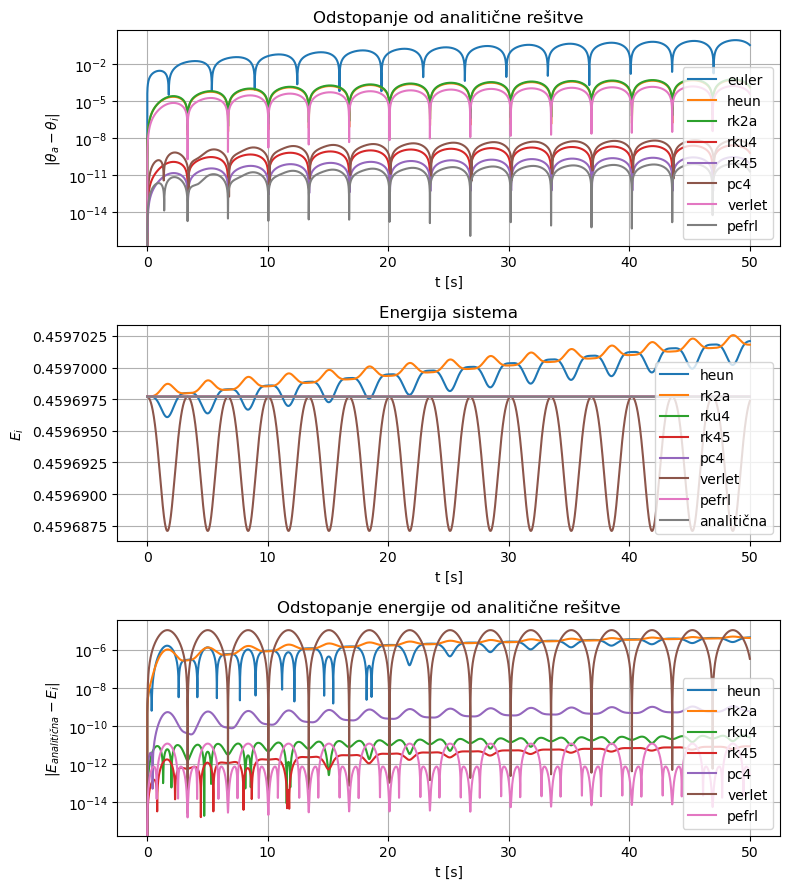

In [111]:
metode = ['euler', 'heun', 'rk2a', 'rku4', 'rk45', 'pc4','verlet', 'pefrl'] #"rkf", 'rk2b' excluded 
t = np.arange(0,50,0.01)
omega = 1.
x_0 = np.array([1., 0])
# print(help(plotter))

data= []
for metoda in metode:
    theta, d_theta, theta_res, error = plotter(t, X_0, omega, metoda = metoda)
    energ = energija(theta, d_theta)
    data.append([theta, d_theta, theta_res, error, energ])

anal_energ = np.ones_like(t) * (1- np.cos(X_0[0]) + X_0[1]**2/(2 * omega **2))

plt.figure(figsize=(8,9))
plt.subplot(3,1,1)
for ind, metoda in enumerate(metode):
    theta, d_theta, theta_res, error, energ = data[ind]
    # theta, d_theta, theta_res, error = plotter(t, X_0, omega, metoda = metoda)
    print(metoda)
    plt.plot(t,error,label=metoda)
plt.title('Odstopanje od analitične rešitve')
plt.xlabel('t [s]')
plt.ylabel(r'$|\theta_a - \theta_i|$')
plt.yscale('log')
plt.grid()
plt.legend()

plt.subplot(3,1,2)
for ind, metoda in enumerate(metode):
    if metoda == 'euler':
        continue
    heta, d_theta, theta_res, error, energ = data[ind]
    plt.plot(t,energ,label=metoda)


plt.plot(t, anal_energ, label='analitična')
plt.title('Energija sistema')
plt.xlabel('t [s]')
plt.ylabel(r'$E_i$')

plt.legend()
plt.grid()
# plt.yscale('log')

plt.subplot(3,1,3)
for ind, metoda in enumerate(metode):
    if metoda == 'euler':
        continue
    heta, d_theta, theta_res, error, energ = data[ind]
    plt.plot(t,np.abs(energ- anal_energ),label=metoda)
# plt.plot(t, anal_energ, label='anal')
plt.legend()
plt.yscale('log')
plt.grid()
plt.title('Odstopanje energije od analitične rešitve')
plt.xlabel('t [s]')
plt.ylabel(r'$|E_{analitična} - E_i|$')

plt.tight_layout()
plt.savefig('napake_podrobno')
# plt.xlim(0, 5)

In [127]:

def verlet2( f, x0, v0, t ):
    """Verlet's 2nd order symplectic method

    USAGE:
        (x,v) = verlet(f, x0, v0, t)

    INPUT:
        f     - function of x and t equal to d^2x/dt^2.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s) of x.  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        v0    - the initial condition(s) of v=dx/dt.  Specifies the value of v when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values for x corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
        v     - NumPy array containing solution values for v=dx/dt corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This function used the Varlet/Stoermer/Encke (symplectic) method
        method to solve the initial value problem

            dx^2
            -- = f(x),     x(t(1)) = x0  v(t(1)) = v0
            dt^2

        at the t values stored in the t array (so the interval of solution is
        [t[0], t[N-1]].  The 3rd-order Taylor is used to generate
        the first values of the solution.

    """
    n = len( t )
    x = numpy.array( [ x0 ] * n )
    v = numpy.array( [ v0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        x[i+1] = x[i] + h * v[i] + (h*h/2) * f(x[i], v[i], t[i])
        v[i+1] = v[i] + (h/2) * ( f(x[i], v[i], t[i])+f(x[i+1], v[i], t[i]))

    return numpy.array([x,v])

def pefrl2( f, x0, v0, t ):
    """Position Extended Forest-Ruth Like 4th order symplectic method by Omelyan et al.

    USAGE:
        (x,v) = pefrl(f, x0, v0, t)

    INPUT:
        f     - function of x and t equal to d^2x/dt^2.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s) of x.  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        v0    - the initial condition(s) of v=dx/dt.  Specifies the value of v when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - NumPy array containing solution values for x corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
        v     - NumPy array containing solution values for v=dx/dt corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.

    NOTES:
        This function uses the Omelyan et al (symplectic) method
        method to solve the initial value problem

            dx^2
            -- = f(x),     x(t(1)) = x0  v(t(1)) = v0
            dt^2

        at the t values stored in the t array (so the interval of solution is
        [t[0], t[N-1]].

    """

    xsi=0.1786178958448091
    lam=-0.2123418310626054
    chi=-0.6626458266981849e-1
    n = len( t )
    x = numpy.array( [ x0 ] * n )
    v = numpy.array( [ v0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        y=numpy.copy(x[i])
        w=numpy.copy(v[i])
        y += xsi*h*w
        w += (1-2*lam)*(h/2)*f(y, w, t[i])
        y += chi*h*w
        w += lam*h*f(y, w, t[i])
        y += (1-2*(chi+xsi))*h*w
        w += lam*h*f(y, w, t[i])
        y += chi*h*w
        w += (1-2*lam)*(h/2)*f(y, w, t[i])
        y += xsi*h*w
        x[i+1]=numpy.copy(y)
        v[i+1]=numpy.copy(w)

    return numpy.array([x,v])


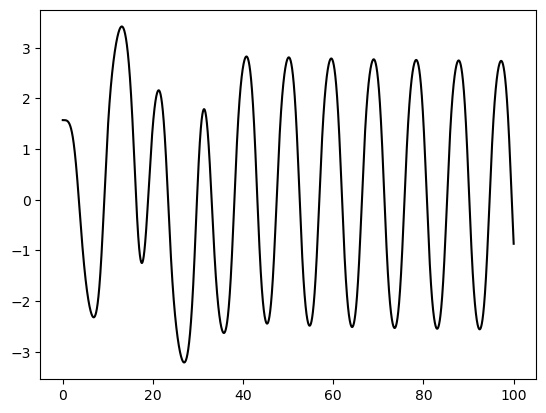

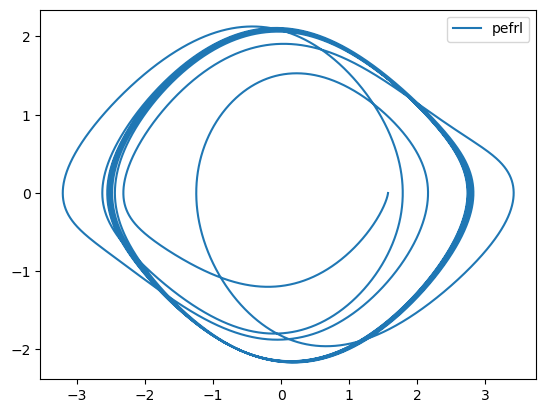

In [129]:
g = 9.81
l = 10.
omega = np.sqrt(g/l)
X_0 = np.array([np.pi/2, 0])
# X_0 = np.array([0, 0])
beta = 0.5
v = 1.
omega = 2/3

def force2(x, dx, t):
    return -np.sin(x) - beta * dx + v * np.cos(omega * t)

def nihalo2(x,t):
    X = np.zeros_like(x)
    x = np.append(x,t)
    X[0] = x[1]
    X[1] = force2(x[0], x[1], t)
    return X


#RK4
t = np.arange(0,100,0.001)
x = rku4(nihalo2, X_0, t).T

theta = x[0]
d_theta = x[1]
# energ = energija(theta, d_theta)


#Euler:
x2 = euler(nihalo2, X_0, t).T

theta2 = x2[0]
d_theta2 = x2[1]
energ2 = energija(theta2, d_theta2)


#verlet:
res_v = verlet2(force2, X_0[0], X_0[1], t)
theta_v = res_v[0]
d_theta_v = res_v[1]
# energ_v = energija(theta_v, d_theta_v)


#pefrl:
res_p = pefrl2(force2, X_0[0], X_0[1], t)
theta_p = res_p[0]
d_theta_p = res_p[1]
energ_p = energija(theta_p, d_theta_p)



# plt.plot(t, theta_v, color='black')
plt.plot(t, theta_p, color='black')
# plt.plot(t, theta, color='orange')
# plt.plot(t, theta2, color='orange')
#približek mali koti
# plt.plot(t,np.cos(t))

#analitična rešitev
# anal_sol = anal_res(t, X_0)
# plt.plot(t[::30],anal_sol[::30], marker='o', color='orange')


# plt.figure()
# plt.plot(theta-anal_sol)
# plt.yscale('log')

plt.figure()
# plt.plot(theta, d_theta, label='rk4')
# plt.plot(theta2, d_theta2,label='')
# plt.plot(theta_v, d_theta_v, label='verlet')
plt.plot(theta_p, d_theta_p, label='pefrl')
plt.legend()

# plt.figure()
# plt.plot(t,energ2, label='euler')
# plt.plot(t,energ_v, label='verlet')
# plt.plot(t,energ_p, label='pefrl')
# plt.plot(t,energ, label='rk4')
# plt.legend()

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8757/273695012.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


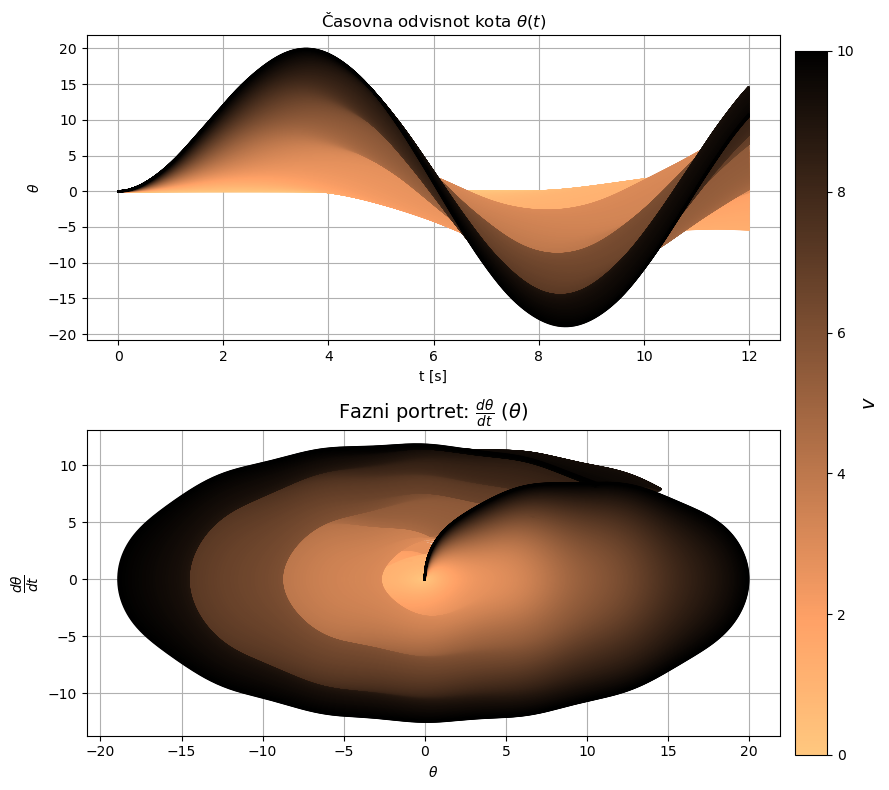

In [207]:

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
cmap1 = plt.get_cmap("copper_r")

g = 9.81
l = 10.
omega = np.sqrt(g/l)
X_0 = np.array([0., 0.])
t = np.arange(0, 12, 0.01)
beta = 0.5
v = 0.3
omega = 1.
omega = 2/3

a_s2 = np.linspace(0.1,0.4,100)
a_s2 = np.linspace(0.,1.8,100)
a_s2 = np.linspace(0.,10.,1000)
norm2 = Normalize(vmin=min(a_s2), vmax=max(a_s2))
cmap2 = plt.get_cmap("copper_r")
resonance = []
for ind,a in enumerate(a_s2):
    v = a

    res_p = pefrl2(force2, X_0[0], X_0[1], t)
    theta_p = res_p[0]
    d_theta_p = res_p[1]

    color = cmap2(norm2(a))
    # print(theta[-1])
    resonance.append(abs(np.max(theta_p)))
    axs[0].plot(t,theta_p,color=color)
    axs[1].plot(theta_p,d_theta_p,color=color)


# theta_v = res_v[0]
# d_theta_v = res_v[1]
# axs[1].plot(theta_v,d_theta_v,color='red', linestyle= '--', label=r'$\theta_0 = 1$')
# axs[0].plot(t,theta_v,color='red', linestyle= '--', label=r'$\theta_0 = 1$')

cax = fig.add_axes([1, 0.05, 0.04, 0.88])
cbar2 = fig.colorbar(cm.ScalarMappable(cmap=cmap2, norm=norm2),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar2.set_label(r'$v$', fontsize=14)



axs[0].set_xlabel('t [s]')
axs[0].set_ylabel(r'$\theta$')
axs[0].set_title(r'Časovna odvisnot kota $\theta (t)$')
axs[0].grid()
# axs[0].legend()

axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$\frac{d\theta}{dt}$', fontsize=14)
axs[1].set_title(r'Fazni portret: $\frac{d\theta}{dt}$ $(\theta)$', fontsize=14)
axs[1].grid()
# axs[1].legend()
plt.tight_layout()
plt.savefig('vzbujeno_nihalo', bbox_inches="tight")

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8757/52722538.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


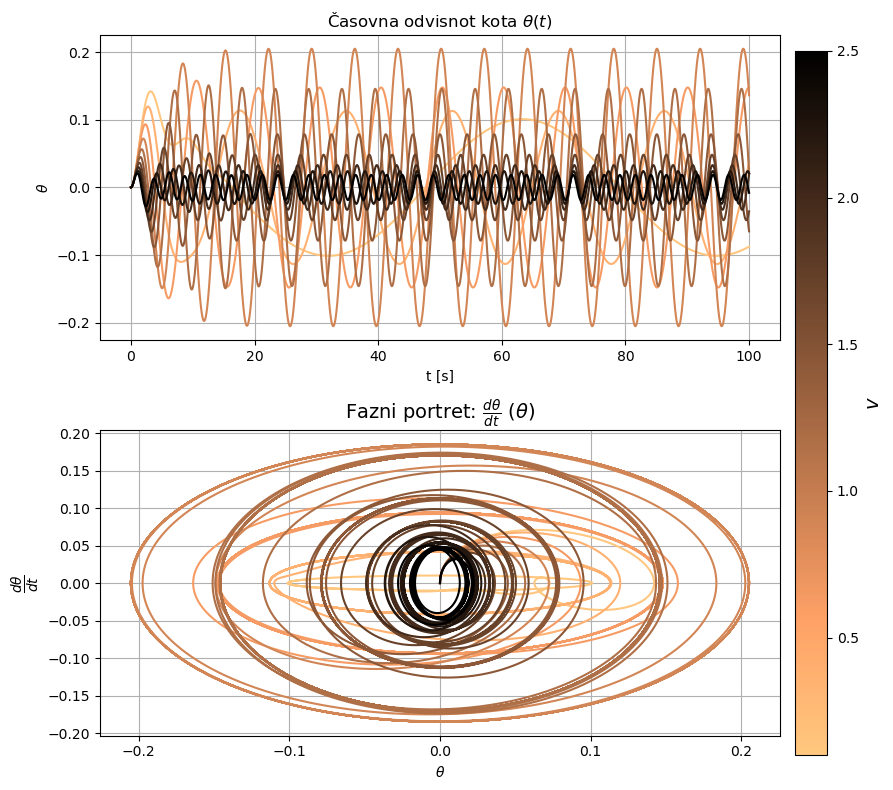

In [174]:

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
cmap1 = plt.get_cmap("copper_r")

g = 9.81
l = 10.
omega = np.sqrt(g/l)
X_0 = np.array([0., 0.])
t = np.arange(0, 100, 0.01)
beta = 0.5
v = 0.1
omega = 1.
omega = 2/3

# a_s2 = np.linspace(0.1,0.4,100)
# a_s2 = np.linspace(0.,1.8,100)
a_s2 = np.linspace(0.1,2.5,10)
a_s3 = np.linspace(0.1,0.5,10)

norm2 = Normalize(vmin=min(a_s2), vmax=max(a_s2))
cmap2 = plt.get_cmap("copper_r")
resonance = []
for ind,a in enumerate(a_s2):
    res_temp = []
    omega = a

    res_p = pefrl2(force2, X_0[0], X_0[1], t)
    theta_p = res_p[0]
    d_theta_p = res_p[1]

    color = cmap2(norm2(a))
    # print(theta[-1])
    res_temp.append(abs(np.max(theta_p)))
    axs[0].plot(t,theta_p,color=color)
    axs[1].plot(theta_p,d_theta_p,color=color)
    resonance.append(res_temp)

    
cax = fig.add_axes([1, 0.05, 0.04, 0.88])
cbar2 = fig.colorbar(cm.ScalarMappable(cmap=cmap2, norm=norm2),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar2.set_label(r'$v$', fontsize=14)



axs[0].set_xlabel('t [s]')
axs[0].set_ylabel(r'$\theta$')
axs[0].set_title(r'Časovna odvisnot kota $\theta (t)$')
axs[0].grid()
# axs[0].legend()

axs[1].set_xlabel(r'$\theta$')
axs[1].set_ylabel(r'$\frac{d\theta}{dt}$', fontsize=14)
axs[1].set_title(r'Fazni portret: $\frac{d\theta}{dt}$ $(\theta)$', fontsize=14)
axs[1].grid()
# axs[1].legend()
plt.tight_layout()
# plt.savefig('vzbujeno_nihalo')

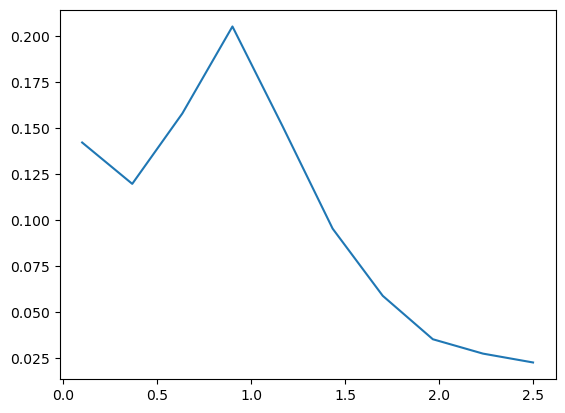

In [175]:
plt.plot(a_s2, resonance)

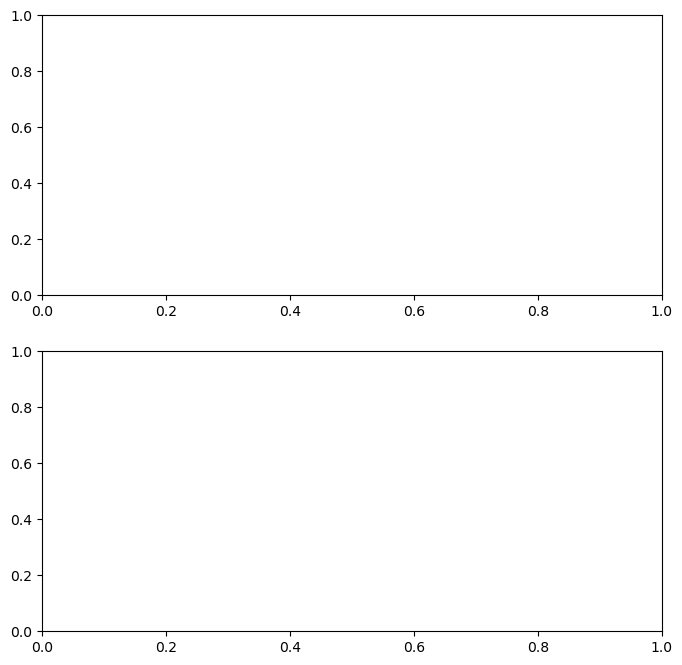

In [186]:

cmap1 = plt.get_cmap("copper_r")

g = 9.81
l = 10.
omega = np.sqrt(g/l)
X_0 = np.array([0., 0.])
t = np.arange(0, 100, 0.01)
beta = 0.1
v = 0.1
omega = 1.
omega = 2/3

# a_s2 = np.linspace(0.1,0.4,100)
# a_s2 = np.linspace(0.,1.8,100)
a_s2 = np.linspace(0.1,2.5,100)
a_s3 = np.linspace(0.1,0.5,100)

norm2 = Normalize(vmin=min(a_s3), vmax=max(a_s3))
cmap2 = plt.get_cmap("copper_r")
resonance = []
cols = []
for ind,b in enumerate(a_s3):
    res_temp = []
    beta = b
    for ind,a in enumerate(a_s2):
        omega = a
        res_p = pefrl2(force2, X_0[0], X_0[1], t)
        theta_p = res_p[0]
        d_theta_p = res_p[1]

        color = cmap2(norm2(b))
        # print(theta[-1])
        res_temp.append(abs(np.max(theta_p)))
        # axs[0].plot(t,theta_p,color=color)
        # axs[1].plot(theta_p,d_theta_p,color=color)
    if ind % 5 == 0:
        print(ind)
    resonance.append(res_temp)
    cols.append(color)
np.save("reson_vzb", resonance)
np.save("colors_vzb", cols)


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_8757/1890346073.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

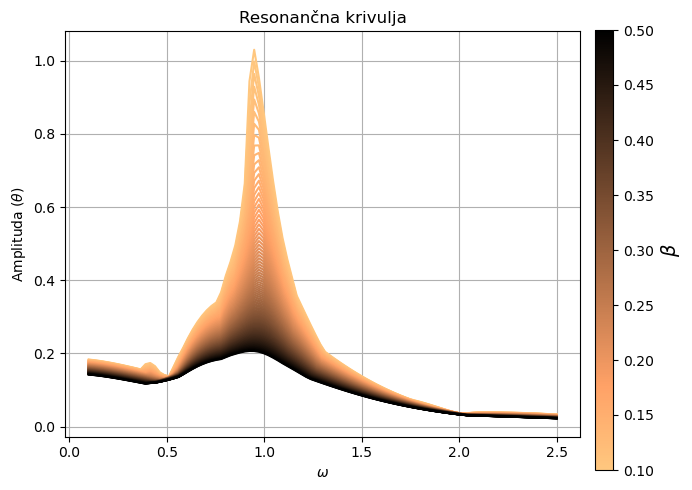

In [208]:
resonance = np.load("reson_vzb.npy" )
cols = np.load("colors_vzb.npy")
plt.figure()
fig, axs = plt.subplots(1, 1, figsize=(6, 5))
a_s2 = np.linspace(0.1,2.5,100)
norm2 = Normalize(vmin=min(a_s3), vmax=max(a_s3))
cmap2 = plt.get_cmap("copper_r")


for ind,res_temp in enumerate(resonance):
    axs.plot(a_s2, res_temp, color=cols[ind])
    color = cmap2(norm2(a_s3[ind]))
cax = fig.add_axes([1, 0.05, 0.03, 0.88])
cbar2 = fig.colorbar(cm.ScalarMappable(cmap=cmap2, norm=norm2),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar2.set_label(r'$\beta$', fontsize=14)


axs.set_xlabel(r'$\omega$')
axs.set_ylabel(r'Amplituda ($\theta$)')
axs.grid()
# axs.yscale('log')
# axs.legend()
axs.set_title('Resonančna krivulja')
plt.tight_layout()
plt.savefig('resonancna_1', bbox_inches="tight")